# Suicide analysis project

On June 14th 2020, Mr. Sushant Singh Rajput decided to end his life by hanging himself to a fan. He was one of the best actors in bollywood, way better than today's starkids.
Why does a person commit suicide? One can only imagine what a person was going through that he resorted to end his life rather than stay and fight.

It is speculated that he was suffering from depression and CBI is still investigating this case as I am doing this project. If something happens in future I will definitely share it with you. 

His death was a sort of turning point in mindset of today's media, after that incident everyone started talking about mental health issues and suicide awareness. This also pushed me to do analysis of suicide data over the years. Here is a try-  

## Downloading the Dataset

Current analysis is done from a kaggle dataset named [Suicide Rates overview 1985 to 2016](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016)

If libraries are not present, uncomment the following lines and run this box

Note - If you want to see the files being downlaoded, remove the -q flag

In [1]:
# !pip install numpy pandas seaborn opendatasets --upgrade -q
### Seaborn automatically install matplotlib, if it is not installed (recetly it has been providing some difficulties in installing)

If you don't have acces to dataset, uncomment the code box below and run this box

1. First you need to have a kaggle account. 
2. Then go to your profile
3. Under the account tab, click on create new API token
4. This will download a `kaggle.json` file, which will have your username and kaggle key, that you require for authentication

In [2]:
# import opendatasets as od
# od.download("https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016")

## Data Preparation and Cleaning

First, make sure to download the dataset from kaggle and extract the `.rar` file.

Let's load the dataset and take a small sample of data to see what we are dealing with




In [3]:
#Importing all libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [4]:
data = pd.read_csv('master.csv')
data.sample(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
23711,Spain,2000,male,25-34 years,400,3377214,11.84,Spain2000,0.827,"595,402,616,547",15538,Generation X
120,Albania,1999,male,75+ years,3,25900,11.58,Albania1999,NaN,"3,414,760,915",1127,G.I. Generation
8572,Estonia,2013,male,35-54 years,52,178072,29.20,Estonia2013,0.859,"25,137,153,149",20221,Generation X
11977,Iceland,2010,male,35-54 years,11,43584,25.24,Iceland2010,0.892,"13,310,567,803",45179,Generation X
10845,Guatemala,1997,female,5-14 years,3,1483012,0.20,Guatemala1997,NaN,"17,790,026,222",1967,Millenials


First let's rename some columns.

In [5]:
data = data.rename(columns ={' gdp_for_year ($) ': 'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'})

Let's do `.info()` method to see if we have any missing values

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            27820 non-null  object 
 1   year               27820 non-null  int64  
 2   sex                27820 non-null  object 
 3   age                27820 non-null  object 
 4   suicides_no        27820 non-null  int64  
 5   population         27820 non-null  int64  
 6   suicides/100k pop  27820 non-null  float64
 7   country-year       27820 non-null  object 
 8   HDI for year       8364 non-null   float64
 9   gdp_for_year       27820 non-null  object 
 10  gdp_per_capita     27820 non-null  int64  
 11  generation         27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


'HDI for year' column seems to have some `NAN` values, let's calculate how many are there?

In [7]:
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

So, 'HDI for year' column has a lot of `NAN` values, it is better to just drop the whole column and make our analysis more accurate. Also, we can drop the 'country-year' column as it doesn't convey much information(we already have the 'country' and 'year' columns)

In [8]:
data.drop('HDI for year', inplace = True, axis =1) 
data.drop('country-year', inplace = True, axis =1)

### Description of dataset
Now, this dataset has 10 attributes namely-
- Country: Name of country from where data is taken
- Year: Year of recording of data
- Sex: Sex (male or female)
- Age: Suicide age range
- Suicides_no: Number of suicides of this sex,in this age range, in this country and in this year
- Population: population of this sex, in this age range, in this country and in this year
- Suicides / 100k pop: Number of suicides per 100k population of this sex,in this age range, in this country and in this year
- Generation: Generation of the age group who commited suicide
- GDP_for_year: GDP of the country in the given year
- GDP_per_capita: ratio between the country's GDP and its population in the given year

## Exploratory Analysis and Visualization

Here is the fun part. Now, we will ask questions and then visualize the answers



In [9]:
#Styling
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = [10, 6]

> **Q1: How have number of suicides per year changed over years?**

Data is from 1985 to 2016, let's construct a lineplot to visualize number of suicides over years.

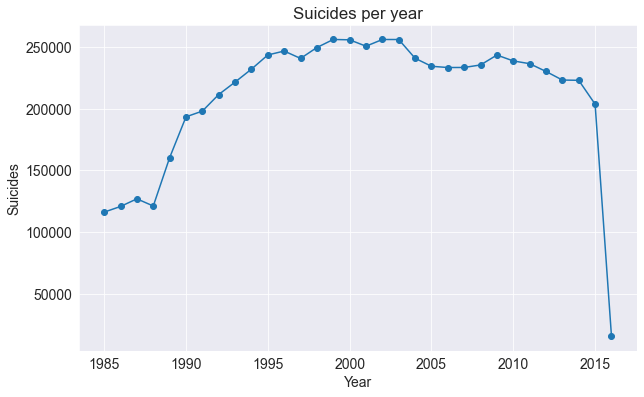

In [10]:
yearly_suicides = data.groupby('year')[['suicides_no']].sum()['suicides_no'] #Pandas series
plt.title('Suicides per year')
plt.xlabel('Year')
plt.ylabel('Suicides')
plt.plot(yearly_suicides.index, yearly_suicides, 'o-');

As we have seen, suicide rates have been increasing overtime(sudden fall at the end is due to
lack of data of year 2016). And there is a sharp increase in suicide rates near 1988, 
let's see if increase in population played any role in this.

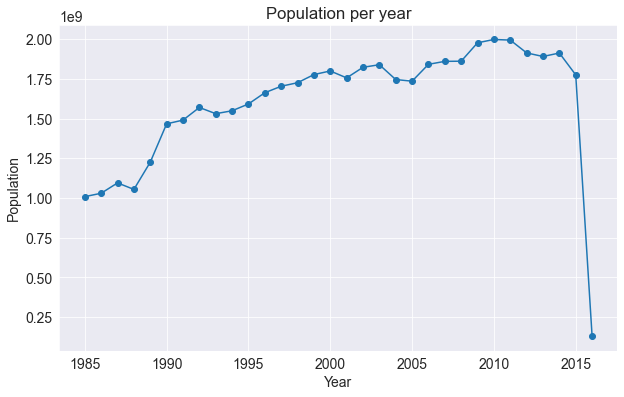

In [11]:
yearly_population = data.groupby('year')[['population']].sum()['population'] #Pandas series
plt.title('Population per year')
plt.xlabel('Year')
plt.ylabel('Population')
plt.plot(yearly_population.index, yearly_population, 'o-');

Just as we expected, we see a population boom in late 80s, which inturn leads to more suicides. 
Let's generalize and see suicide rates per 100k population over the years

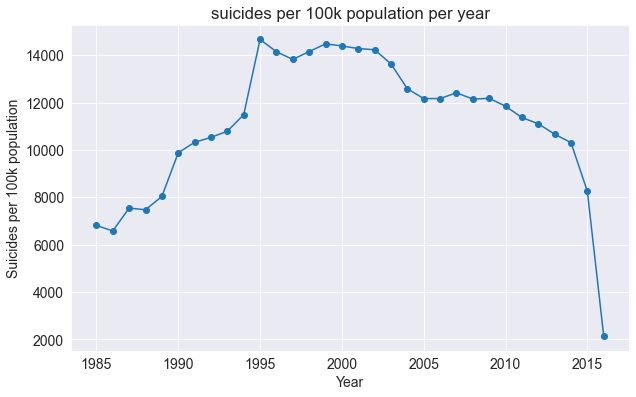

In [12]:
yearly_suicides_100k = data.groupby('year')[['suicides/100k pop']].sum()['suicides/100k pop']
plt.title('suicides per 100k population per year')
plt.xlabel('Year')
plt.ylabel('Suicides per 100k population')
plt.plot(yearly_suicides_100k.index, yearly_suicides_100k, 'o-');

This plot gives more clarity and we observe actually peak of suicides occur in 1995. 
And suicide rates have been decreasing since then. 

This is due to increased awareness towards
depression and suicide helplines made readily available in most countries.

> **Q2: How are suicide rates affected on the basis of country?**

First let's see, how many countries are we dealing with

In [13]:
len(data.country.unique())

101

So, we are dealing with 101 countries, plotting all of them in one graph will be a mess, so 
let's plot just the top 20


C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


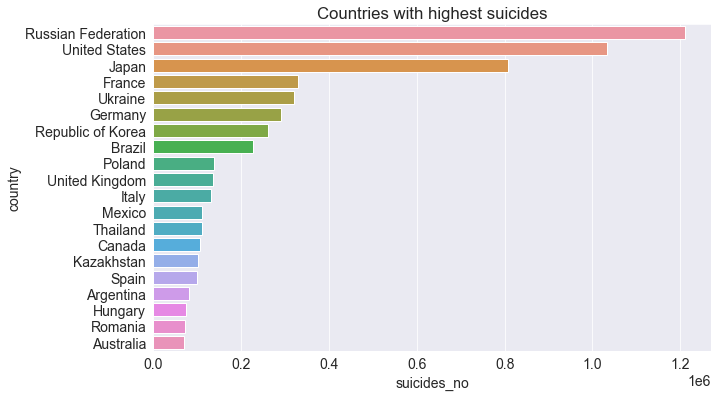

In [14]:
country_suicides = data.groupby('country')[['suicides_no']].sum()['suicides_no'] #Pandas series
top_countries = country_suicides.sort_values(ascending = False).head(20) #Sorted series
plt.title('Countries with highest suicides')
sns.barplot(top_countries, top_countries.index);

So, Russian federation is leading in suicides over time. 

It is belived that heavy alcohol consumption is a major factor in increasing the suicide rates in Russia.Let's see what we get when we remove the population factor by plotting suicides per 100k population insted of suicide_no


C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


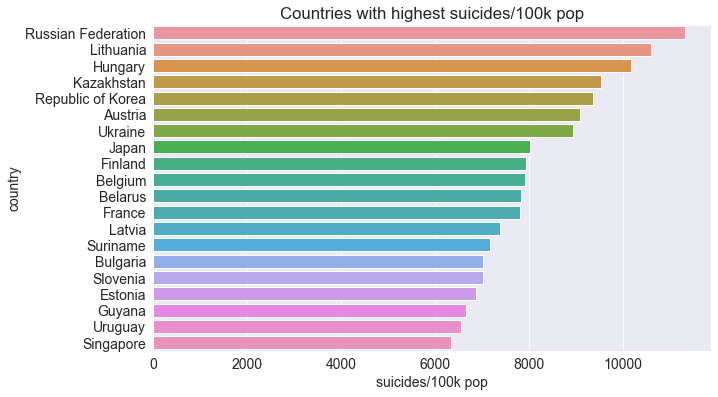

In [15]:
country_suicides_100k = data.groupby('country')[['suicides/100k pop']].sum()['suicides/100k pop'] #Pandas series
top_countries_100k = country_suicides_100k.sort_values(ascending = False).head(20) #Sorted series
plt.title('Countries with highest suicides/100k pop')
sns.barplot(top_countries_100k, top_countries_100k.index);

So, Russia is still on top but Lithuania and Hungary follow closely. 

It is speculated that 
social and financial problems in Lithuania and Hungary lead people to commit suicide

> **Q3: Which age group commits most suicides?**

Let's see what age groups are we provided with

In [16]:
data.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

Let's plot all age groups as bar chart

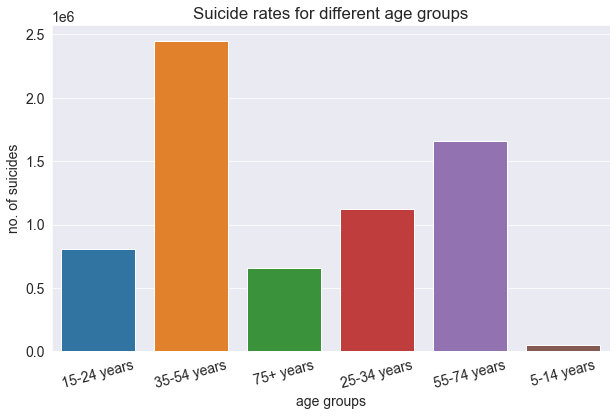

In [17]:
suicides_no_age = []
for a in data['age'].unique():
    suicides_no_age.append(sum(data[data['age'] == a]['suicides_no']))
plt.title('Suicide rates for different age groups')
plt.xlabel('age groups')
plt.ylabel('no. of suicides')
plt.xticks(rotation = 15)
sns.barplot(x = data['age'].unique(), y = suicides_no_age);

So, people of age group (35-54 years) commit most suicides. 

This is due to increased 
family pressure, financial burdens and other socio-economic factors. Now, let's plot age groups
vs suicide per 100k population

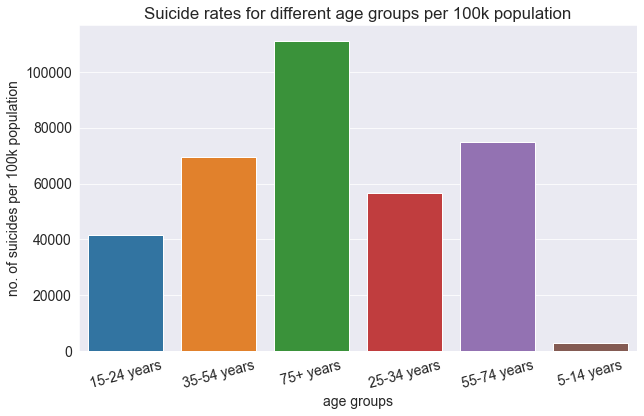

In [18]:
suicides_no_age_100k = []
for a in data['age'].unique():
    suicides_no_age_100k.append(sum(data[data['age'] == a]['suicides/100k pop']))
plt.title('Suicide rates for different age groups per 100k population')
plt.xlabel('age groups')
plt.ylabel('no. of suicides per 100k population')
plt.xticks(rotation = 15)
sns.barplot(x = data['age'].unique(), y = suicides_no_age_100k);

This gives us an interesting insight that actually it is the old people that commit more 
suicides. Major factors compelling suicide are loneliness, loss of spouse, negligation from
children etc.

> **Q4: Which generation is more depressed and hence commited more suicides?**

First let's see the generation list

In [19]:
data.generation.unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

### A small explanation of generations 
- **GI generation (1901-1927)** - Also known as the greatest generation , these were the 
	people who fought WW2 
- **Silent generation (1928-1945)** - This generation is a little smaller than the others
	 because Great Depression and WW2 caused people to have less children. This generation 
	 is known for not exprssing its views publicly and hence the name.
- **Boomers (1946-1964)** - This generation is named so due to the 'post WW2 baby boom', when 
	fertility rates reached an all time high. 
- **Generation X (1965-1980)** - Also called the MTV generation, this generation is separated
	 from other generations due to its vibrant culture
- **Millenials (1981-1996)** - This generation is marked by elevated usage of and familiarity
	with internet, social media, mobile and computers.
- **Generation Z (1997-2010)** - This generation is seen as more educated, well behaved but 
	also more depressed than previous generations, most probably due to advances in technology.

C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


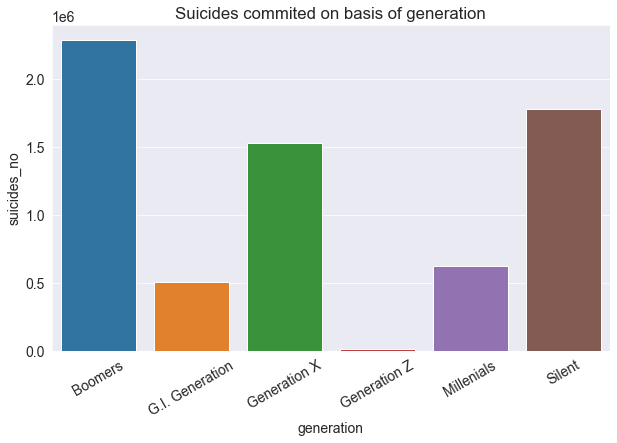

In [20]:
generation_suicides = data.groupby('generation')[['suicides_no']].sum()['suicides_no']
plt.title('Suicides commited on basis of generation')
plt.xticks(rotation=30)
sns.barplot(generation_suicides.index, generation_suicides);

It seems boomers resort to suicide the most, and this is actually a very big problem. 
[See this link](https://www.macleans.ca/society/are-baby-boomers-the-suicide-generation/)

> **Q5: What role does GDP of a country play in its suicide rates?**

Let's plot a scatterplot of suicides in countries sorted on basis of GDP

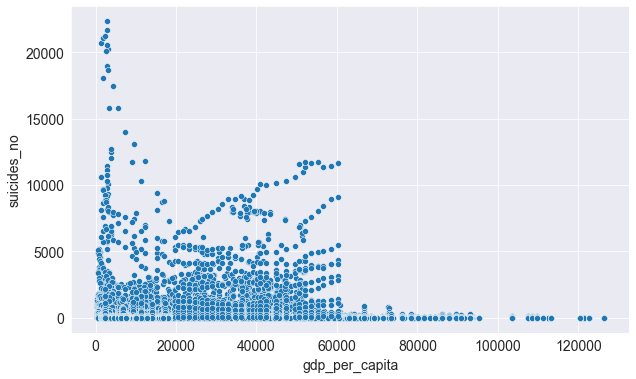

In [21]:
sns.scatterplot(x = 'gdp_per_capita', y = 'suicides_no', data = data);

So, suicide rates are pretty high in poor countries and tend to decrease as GDP grows. But 
suicide rates increase again after 20k mark in GDP. Also scatterplot abruptly stops at 60k mark,so probably data is incomplete after 60k

> **Q6: Which sex commits more suicides, male or female?**

C:\Users\admin\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


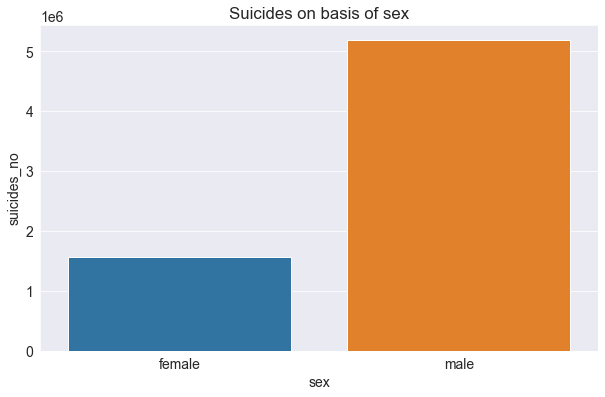

In [22]:
sex_suicides = data.groupby('sex')[['suicides_no']].sum()['suicides_no'] #Pandas series
plt.title('Suicides on basis of sex')
sns.barplot(sex_suicides.index, sex_suicides);

So, Men commit more suicide than women. See [this 30s video](https://youtu.be/BQcuk_ebNSM) 
to know why. 

Jokes aside, let's see who commits more suicides men vs women on basis of different 
age groups

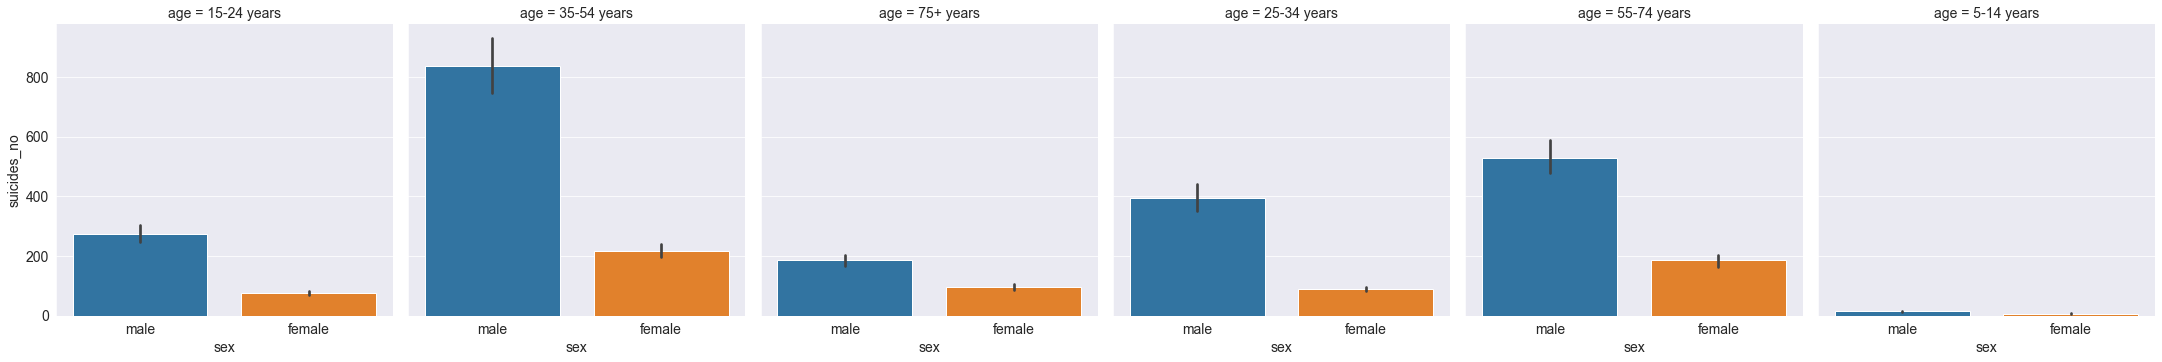

In [23]:
sns.catplot(x='sex', y='suicides_no',col='age', data=data, kind='bar');

So, men commit suicide more than women in any age group. 

This is due to a variety of factors, 
men tend to be inclusive and don't express emotions, they also have huge responsibilities of
family, income etc.

## Inferences and Conclusion

- So, overall suicide rates have been decreasing, which is good
- Data seems to be flawed on the basis of GDP, so suicide analysis on the basis of GDP can't be  trusted
- Also, I expected a lot more teen suicides. Probably data is too old
- Overall, data analysis was as expected. 
    - Russia is leading in number of suicides in a country(due to its vodka addiction)
    - Old people tend to commit suicide the most
    - Boomers are setting a new record, by resorting to suicide greater than any generation in the past
    - Men, as expected commit suicides greater than women.
    
    